# Citi Bike Distribution in New York City 

<img src="../images/e.png" width="1000" height="60"></img>

This project aims to answer the question **How well does Citi Bike represent NYC demographics? (in 2017)**. (Fix after analysis)

#### Team Members 
- Seonghee Lee (sl994) 
- Nicholas Rahardja (nmr73)
- Chelsea Choi (cc2583)

#### Team Github
- https://github.com/shljessie/citibike-nyc

#### Team Raw Data Google Drive 
- https://drive.google.com/drive/folders/197_d1BwPHXmVuyKA6I7UEyEw4Nqo8dAk 

#### Team Final Data Google Drive 
- https://drive.google.com/drive/folders/1glgD5ly1ABej2GDXzc-iUMjpu4HkItwa?usp=sharing
<br/> 

_______________


## Contents of this Notebook

1. Introduction
2. Data Description 
3. Pre Registration Statement 
4. Data Analysis 
5. Evaluation of Significance 
6. Interpretation and Conclusion
7. Limitations 
8. Source Code
9. Acknowledgement 
10. Appendix 
<br/> 

_______________

# 1) Introduction

1. Context of Work
2. Research Question
3. Main Findings
4. Summary of Results


#### 1. Context of Work

Over the past decade, bike share has been one of the Great U.S. transportation success stories. Starting with Tulsa, Oklahoma’s program that launched in 2007, more than 60 U.S. cities now have bike-share systems. It is undeniable, that bike sharing systems provide many benefits such as reducing the amount of congestion, noise, and air pollution in urban areas. However, **whether or not these bike sharing systems are truly accessible for all demographics is questionable.** Since the accessibility of these bike sharing systems depend heavily on where the stations are located, it is very likely that where you live becomes the deciding factor in whether or not you will be able to utilize this bike sharing system. 

In coming up with our research question, we considered many of the past research that has been conducted on the fairness of bike sharing systems. For example, a [study done by Portland State University](https://trec.pdx.edu/research/project/884) suggests that significant portions of the population are underrepresented among bike share users, including people of color, lower-income, female, older adults and less-educated groups.

In this project, we are looking closer into how these findings on the fairness of bike sharing systems applies to New York City and Citi Bike in particular. We have chosen to focus our analysis to New York City and Citi Bike, since New York City is one of the most diverse cities in the world, and Citi Bike is the predominant bike share system used in NYC. More specifically, **we will look into how Citi Bike stations are distributed in NYC** and how this relates to the following factors: 1) race and income and 2) Citi Bike usage. In doing so, we will attempt to answer the following questions: Are there more stations in areas of higher usage regardless of race and income? Does race and income seem to have an unignorable correlation with how Citi Bike stations are being distributed? How strongly does race, income, and usage determine the distribution of Citi Bike stations? How might Citi Bike station distribution be made more equittable? 

Lastly, after gaining insight into the factors which influence how Citi Bike stations are distributed in NYC, we will attempt to provide reccomendations for ways in which Citi Bike can improve their distribution of stations to ensure 
that the placements of stations matches demand and that all demographics are fairly represented. 

#### 2. Research Question

How is Citi Bike representing NYC demographics? (in 2017).

Here **NYC demographics** will refer to **Race&Income of NYC** and the **usages of Citi Bike trips**.

On the other hand, **Citi Bike representation** will refer to the the distribution of stations.

#### 3. Project Design + Limitations 

We are specificially looking at **NYC Citi Bike trip data in 2017 as a sample** of the representation of NYC bike stations around New York. We chose New York City's Citi Bike system since New York City is an area where there are widely varying levels of income. 
We chose 2017 for two reasons,    1) NYC's race and income data was available for the years 2013 -2018 and 2) 2017 was a year when many new stations of Citi Bike where added to represent its overall usage.
We decided that 2017 would be a fair representation of how Citi Bike stations were distributed throughout NYC.

We chose geoid as our standard for breaking up NYC into different geographical areas, since a geoid is the unique indentifier for a census tract, and a census tract is the smallest geographic region which the US goverment collects race and income data on during its annual Census. A census tract is roughly equivalent to a neighborhood, and they generally encompass a population between 2500 to 8000 people. 
<a href="https://popfactfinder.planning.nyc.gov/#11.77/40.7438/-73.99">This link </a> has more information on geoids and the visual size of them on a map.

#### 4. Main Findings

> Intuitively, one might think that demand would be the strongest factor that influenced the placement of Citi bike stations. However, through linear regression, we found that the relationship between trips and stations is moderate and other factors influence the placement of stations. Additionally, we found that location plays an important role in the placement of stations.

> We found that as of 2017, Citi Bike has primarily placed bike stations in areas that are predominantly white and wealthy. In doing so, Citi Bike has neglected to account for the needs of predominantly asian and black neighborhoods in NYC.

#### 5. Summary of Results
- We found that census tracts with a high number of stations actually had a lower number of trips. 
- We found that white and high income areas had a high number of stations
- We found that white areas have a high number of stations to meet demand
- We found that asian and black neighborhoods do not have enough stations to meet their current demand.
<br/> 

_______________

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import DataFrame

# 2) Data Description 

For this project we used 3 different data sets. 
1. Citi Bike Trip Data
2. Citi Bike Station Data
3. NYC Race and Income Data

The data cleaning process of for these datasets are <a href="https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning">linked here</a>

### Dataset 1: Citi Bike Trip Data

In [2]:
trips_df = pd.read_csv('../data/citibike_trip_final.csv')
print('Number of Rows: {}'.format(trips_df.shape[0]))
print('Number of Columns: {}'.format(trips_df.shape[1]))
trips_df.head()

Number of Rows: 14049057
Number of Columns: 9


,start_time,stop_time,start_station_name,end_station_name,birth_year,gender,start_station_geoid,end_station_geoid,trip_minutes
0,2017-01-01 00:00:21,2017-01-01 00:11:41,W 82 St & Central Park West,Central Park West & W 72 St,1965.0,2,3.606102e+10,3.606101e+10,11
1,2017-01-01 00:00:45,2017-01-01 00:22:08,Cooper Square & E 7 St,Broadway & W 32 St,1987.0,2,3.606100e+10,3.606101e+10,21
2,2017-01-01 00:05:00,2017-01-01 00:14:20,Broadway & W 60 St,9 Ave & W 45 St,1973.0,1,3.606101e+10,3.606101e+10,9
3,2017-01-01 00:05:37,2017-01-01 00:19:24,Broadway & W 37 St,E 10 St & Avenue A,1977.0,2,3.606101e+10,3.606100e+10,13
4,2017-01-01 00:05:47,2017-01-01 00:10:02,York St & Jay St,Carlton Ave & Flushing Ave,1989.0,1,3.604700e+10,3.604702e+10,4


##### 1. What are the observations (rows) and the attributes (columns)?
Each observation in this data set corresponds to a trip taken on Citi Bike in 2017. The following are the features that are recorded for each trip: 
- start_time: Datetime object for the start time and date of the trip
- stop_time: Datetime object for the end time and date of the trip
- start_station_name: Name of starting station of the trip, a string
- end_station_name: Name of ending station of the trip, a string
- birth_year: Year user was born, an integer
- gender: (Zero=unknown; 1=male; 2=female)
- trip_minutes: Duration of the trip in minutes, an integer
- start_station_geoid: Unique identifier for the census tract that the trip started in, an integer
- end_station_geoid: Unique identifier for the census tract that the trip ended in, an integer. 

##### 2. Why was this dataset created?

This dataset was created to help developers, engineers, statisticians, artists, academics and the local public to explore the usage of citi bike around New York City. Insights from these findings would help Citi Bike officials find answers to questions like where Citi Bike users ride, how far they go,and what stations are the most popular. It is an open dataset on the public bike sharing system of New York City. It is open to the public to help people find insights about this system.

##### 3. Who funded the creation of the dataset?

This Citi Bike data was funded by Citi Bike in New York. Lyft is the operator of the Citi Bike program in New York City and Jersey City. The raw dataset was collected from this source https://www.citibikenyc.com/system-data 

##### 4.What processes might have influenced what data was observed and recorded and what was not?

Trips that may have been taken by staff who are managing Citi Bike throughout the city are not good representations of Citi Bikes trips by users only. Bikes may have been relocated overnight so that the distribution of bikes around the city are evenly distributed. Also bikes that may have been broken may lead to a loss of data.  Also Citi Bike usage trip data is not a complete representation of all bike rider data in New York. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

We dropped columns that we would not be using in our analysis, and also removed rows that had NaN values in them. Furthermore, since the original trips dataset was very large we chose to only consider trips taken by users who are Citi Bike subscribers, in order to reduce the size of the dataset. Deciding to only keep trip data for subscribers also makes sense since, more then 90% of the original trips were taken by subscribers, so removing trips taken by non-subscribers (tourists and onetime users) should not have resulted in any significant loss of data. We have also dropped trips that were over 3 hours. The reason for this is because we wanted to be looking at regular users of Citi Bike. If you keep a bike out for longer than 30 minutes at a time, regardless of the type, it's $0.18 per minute. According to Citi Bike website in 2017 (https://www.citibikenyc.com/pricing/single-ride). Therefore using a Citi Bike for unreasonably long hours of time even if you are a subscriber would be unreasonable since you are being charged. For this analysis we decided to set 3 hours as the limit to a reasonable amount of time,  a person who regularly uses a Citi Bike would ride.  The original table has spaces in its column names, so we decided to change these with underscores to make the more friendly for computation. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

In signing up for using Citi Bike, these users are allowing for Citi Bike to take data of their usage. 
Citi Bike releases information about the user’s ride and trip duration  including their start station, usertype(Subscriber, one time user), gender, and year of birth. Citi Bike plans on using this data to understand citi bike users and the overall trend of citi bike users in new york city. Though many Citi Bike users might not have been aware of this, they could have assumed that the data was collected to understand the Citi Bike users for business related reasons.

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/drive/folders/11YUr4yiiFKCNlN2MnGPGpCeXyrq92A0Z?usp=sharing



### Dataset 2 : Citi Bike Stations Data

In [3]:
stations_df = pd.read_csv('../data/citibike_stations_final.csv')
print('Number of Rows: {}'.format(stations_df.shape[0]))
print('Number of Columns: {}'.format(stations_df.shape[1]))
stations_df.head()

Number of Rows: 839
Number of Columns: 10


,station_id,station_name,lat,lon,first_trip,last_trip,geoid,trips_starting_here_2017,trips_ending_here_2017,total_trips_2017
0,254.0,W 11 St & 6 Ave,40.735324,-73.998004,2013-06-01,2019-07-31,36061006300,141183,143935,285118
1,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,2013-06-01,2019-07-31,36061006300,141183,143935,285118
2,253.0,W 13 St & 5 Ave,40.735439,-73.994539,2013-06-01,2018-10-31,36061006300,141183,143935,285118
3,345.0,W 13 St & 6 Ave,40.736494,-73.997044,2013-06-01,2018-10-31,36061006300,141183,143935,285118
4,151.0,Cleveland Pl & Spring St,40.721816,-73.997203,2013-06-01,2019-07-31,36061004100,121704,118537,240241


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a unique Citi Bike station in NYC. The following are the features for each station that is collected in this dataset: 

- station_id: Unique identifier for a station, an integer
- station_name: Name of the station, a string 
- lat: Latitude of the station, a float
- lon: Longitude of the station, a float 
- first_trip: Date of the first trip ever taken from the station, DateTime object 
- last_trip: Date of the last trip taken from the station (at the time this data set was downloaded), DateTime object
- geoid: Unique identifier for the NYC census tract that the station is located in, an integer 
- trips_starting_here_2017: number of trips taken from this station in 2017, an integer 
- trips_ending_here_2017: number of trips ending at this station in 2017, an integer
- total_trips_2017: total number of trips taken to and from this station in 2017, an integer

##### 2. Why was this dataset created?

The base dataset for this table came from the same source as the Citbike trip data set described above. However, more processing was done to this data to obtain this station dataset by a team of MIT researchers who were trying to map out the locations of Citi Bike stations in NYC for their research purposes. 

##### 3. Who funded the creation of the dataset?

This table uses as its base table the Cibike trip data set that was funded by Citi Bike in New York. However, the processing that was done to this raw citi bike data was done by MIT researchers, so it can be assumed that MIT indirectly funded the creation of this Citi Bike trip data set. MIT Media Lab research: https://github.com/aberke/income-race-bikes/tree/master/data/nyc-bike


##### 4.What processes might have influenced what data was observed and recorded and what was not?

A small number of stations are located on the boundary between two census tracts, in which case we decided to select the first census tract returned by the API. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

The original Citi Bike station data, was already well formatted, but did not include the geoid which we needed to identify, which geographic location does the station belong to. To obtain this geoid for each station, we used an API to obtain the geoid corresponding to the census tract that the station is located in. Next since our project focuses on 2017, we removed all stations that had its first trip after 2017 since this means that these stations were made after 2017, and thus are not relevant to our analysis. Furthermore, the original dataset had the number of trips from each station calculated up to 2019, thus we removed this column and used the trip dataset to calculate the number of trips taken to and from each station in 2017. We also renamed a few columns to make their names more intuitive such as renaming ‘id’ to ‘station_id’ and ‘name’ to ‘station_name’. 
Currently this station dataset doesn't exclude stations that are located in parks. But when we use this data alongside the race/income data of NYC the geoids of the parks (so the stations that are located in parks)are naturally removed because the census data of race/income does not look at a census of a park. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Since this data set is derived from the citi bike trips dataset, citi bike users were made aware that Citi Bike would be tracking their usage data, when users signed up for the application. 

The expected usage of this data is the same as for the Citi Bike trip data above. 


##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/file/d/1pATvzg-PTpPvs_8x5pKIs_jqlbKrWyat/view?usp=sharing


### Dataset 3 : NYC Race and Income Data in 2017

In [4]:
race_income_df = pd.read_csv('../data/race_and_income_final.csv')
print('Number of Rows: {}'.format(race_income_df.shape[0]))
print('Number of Columns: {}'.format(race_income_df.shape[1]))
race_income_df.head()

Number of Rows: 4787
Number of Columns: 8


,geoid,2017_median_income,2017_population,2017_white_population,2017_black_population,2017_asian_population,2017_other_population,2017_2_or_more_races
0,36001000100,27250,1939,502,1142,16,112,167
1,36001000200,24091,4731,710,3474,104,32,411
2,36001000300,33454,5558,2589,1539,559,291,580
3,36001000401,74255,2459,2183,131,92,28,25
4,36001000403,70815,4695,3256,714,416,79,230


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a different census tract in NYC. A census tract is the smallest geographical area, defined by the US goverment, which census data is collected on. For each census tract the following are the attributes in the dataset. 

- geoid: Unique identifier for the census tract that the station is located in, an integer 
- 2017_median_income: Median income (dollars) in the census tract in 2017, an integer
- 2017_population: Total population in the census tract in 2017, an integer
- 2017_white_population: Total number of White individuals in the census tract, an integer
- 2017_black_population: Total number of Black individuals in the census tract, an integer
- 2017_asian_population: Total number of Asian individuals in the census tract, an integer
- 2017_2_or_more_races : Total number of individuals who identify as two or more races in the census tract, an integer

##### 2. Why was this dataset created?

This dataset was created in order to study the census tract data along with the associated race and income in that tract from 2017. This was done by extracting the household median income and household race from the American Community Survey. 

##### 3. Who funded the creation of the dataset?

This data was created and funded by the United States Census bureau. ACS: https://data.census.gov/cedsci/The creation of this dataset was funded by the MIT Media Lab. MIT Media Lab : https://github.com/aberke/income-race-bikes/blob/master/data/ny/race_and_income_data.csv.

##### 4. What processes might have influenced what data was observed and recorded and what was not?

The American Community Survey’s data collection process is performed by randomly selecting 3.5 million addresses to reply to the survey in order to represent the entire population. Because this survey is limited to those with addresses, there may be households and individuals who are not recorded in the census. For example, the homeless population is difficult to track and therefore could influence the data as well. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?
Because the original data from the American Community Survey was downloaded as a shapefile, the data had to be extracted and transformed into a dataframe. After extracting the race, income, and renaming the columns, the data set was created. 

Next, we dropped rows where the median income was missing or had NaN values. Furthermore for census tracts that had median income values of '$250,000+' we changed the median income value to '250,000' so that they can be treated as a numeric value. Laslty, we only kept the race and income data for 2017 and dropped all the other columns which correspond to the other years. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
The individuals contacted were aware of the data collection. In the constitution, it states that a census must be taken every 10 years. People likely understand the main purpose of the census as determining where federal and state funding should be spent. Moreover, their data is protected from being shared and used by any other government agency. 

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
https://drive.google.com/file/d/1obfrrDul07XDXEvyK6kf-N66_2K5-g88/view?usp=sharing
<br> 

_________

# 3) Preregistration Statement 

#### Research Question: How is Citi Bike representing NYC demographics?

>In our research question NYC demographics refers to  **1) the usage of Citi Bike** and **2) the race and income of NYC**


#### Analysis 1: What is the relationship between Citi Bike trips and number of stations in a census tract?

>This analysis idea is intended to explore the relationship between Citi Bike usage (trips) and the number of stations in a geoid. Here we are mainly attempting to answer the question **"Are there more stations in areas of higher usage?"**
We will check through graphs to explore what the relationship between trips and stations look like and confirm the relationship/absence of a relationship through **Linear Regression** and statistical findings.
Additionally we will be looking more closely at geoids with many stations but low amount of trips to see what may have caused an increased amount of stations in those areas.

       
#### Analysis 2: What is the relationship between station placements and the race & income demographic of the census tract? 

>To further our understanding of whether Citi Bike stations are fairly distributed, we will look into whether the placement of Citi Bike stations are influenced by the race and income demographics of a census tract. We will use Logistic Regression to confirm/deny the presence and strenght of this relationship. 

# 4) Data Analysis 

### Analysis 1: What is the relationship between Citibike trips and number of stations in a census tract?

>##### Trips vs Number of Stations in a Census Tract
We first want to look into whether citibike stations are distributed mainly based on demand. Here we start off by understanding the relationship between citibike trips and the number of stations in a census tract.


In the code below we show the process of grouping the stations by geoid, and linking the number of trips taken at each of the stations.

#### Trips and Stations by Geoid

Text(0.5, 1.0, 'Geoids where Trips Started')

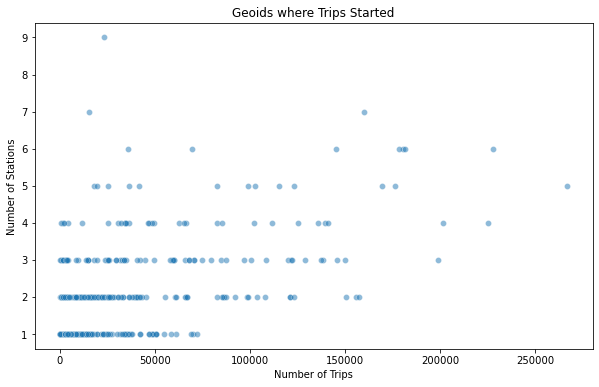

In [59]:
#group by geoid and count number of stations
stations_geoid = stations_df.groupby(['geoid']).size().reset_index(name = 'Number of Stations')
stations_geoid = stations_geoid.sort_values('Number of Stations', ascending=False)

#remove park geoids
geoids_remove=['36061014300','36047017700','36061000500','36081009900','36061031703','36047001800','36081003700']
stations_geoid = stations_geoid[~stations_geoid['geoid'].isin(geoids_remove)]

## Number of Start Stations at each geoid
trips_start_df = trips_df.groupby(['start_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_start_df = trips_start_df.sort_values('Number of Trips', ascending=False)
trips_start_df = trips_start_df.rename(columns={'start_station_geoid': 'geoid'})
trips_start_df= pd.merge(stations_geoid,trips_start_df,  on=['geoid'], how='inner')

fig, (ax1) = plt.subplots(figsize=(10,6))

## Start Stations
sns.scatterplot(y="Number of Stations", x="Number of Trips", data=trips_start_df,ax=ax1, alpha=0.5)
ax1.set_title("Geoids where Trips Started")


Here we have created a two scatterplots. Each of the points in the scatterplot refer to a unique geoid in New York City. These two scatterplots show the number of stations in that geoid and the number of trips taken in that geoid. 

Looking at the scatterplot, **there seems to be no linear relationship between the number of stations and the number of trips in a geoid**. For stations in the range 1-5, as the number of stations increases, there seems to be a wider range of number of trips. As the number of stations increases there is more variability in the number of trips in the data. However, as we look at the geoids with 6,7,9 stations we can see that some of these places, despite having a significantly lower amount of trips have more stations compared to other geoids. For the geoid with 9 stations, there is very low usage. Other geoids with similar usage have only 1 or 2 stations. This goes the same for places with 5,6,7,9 stations. Though some places have a lot of usage, there seems to be a oversupply of stations in these areas.

We were able to see through this scatterplot that places with more trips did not lead directly to having more stations. This means that there must be other factors that are influencing the amount of stations that are placed in a geoid.
For our next step, we will be looking at geoids with more stations than the average , specifically geoids with 6,7,9 stations. We will first take a look to see where these areas are located on a map.
We have decided to first check the location because disregarding race/income one thing we think may have influenced a larger number of stations is location. For example, If it is close to a dock area or if the place has more parks this may influence the number of stations in that area. 
Now for our next step we will see if the places with a greater amount of stations are influenced by location and check where each of the geoids are located.

But first we will compute the average number of trips taken from all the geoids to use as a metric in the next steps of our analysis

#### Average Number of Trips Computation & Visualization

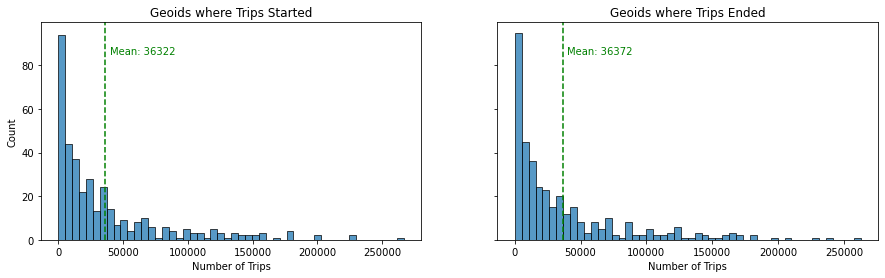

Average Number of Trips (Start) :  36322
Min Number of Trips (Start) :  47
Max Number of Trips (Start) :  266800


Average Number of Trips (End) :  36373
Min Number of Trips (End) :  41
Max Number of Trips (End) :  262553


In [6]:
# Average Calculation 
mean_start= np.mean(trips_start_df['Number of Trips'])
mean_end= np.mean(trips_end_df['Number of Trips'])

# Max and Min Trips Calculation
min_start=np.min(trips_start_df['Number of Trips'])
max_start=np.max(trips_start_df['Number of Trips'])
min_end=np.min(trips_end_df['Number of Trips'])
max_end=np.max(trips_end_df['Number of Trips'])

# Draw the Number of Trips plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4),sharey=True)
sns.histplot(data=trips_start_df,x="Number of Trips",bins=50,ax=ax1)
ax1.axvline(mean_start, color="green", linestyle="dashed")
ax1.text(40000,85,'Mean: 36322', fontsize=10, color='green')
ax1.set_title("Geoids where Trips Started")

sns.histplot(data=trips_end_df,x="Number of Trips",bins=50,ax=ax2)
ax2.axvline(mean_end, color="green", linestyle="dashed")
ax2.text(40000,85,'Mean: 36372', fontsize=10, color='green')
ax2.set_title("Geoids where Trips Ended")
ax2.set(ylabel='Count')
plt.show()

print("Average Number of Trips (Start) : ","{:.0f}".format(mean_start))
print("Min Number of Trips (Start) : ","{:.0f}".format(min_start))
print("Max Number of Trips (Start) : ","{:.0f}".format(max_start))
print("\n")
print("Average Number of Trips (End) : ","{:.0f}".format(mean_end))
print("Min Number of Trips (End) : ","{:.0f}".format(min_end))
print("Max Number of Trips (End) : ","{:.0f}".format(max_end))

In geoids where trips started, the average number of trips is 36322. The minimum number of trips is 47 and the maximum number of trips is  266800.

In geoids where trips ended, the average number of trips is 36373. The minimum number of trips is 41 and the maximum number of trips is 262553.

From this we can see that the average number of trips taken for both of these cases are very similar. From the distribution bar graph, we can also see that the two graphs are right-skewed. A majority of the trips taken lie within the 0-50000 range for both of the two distributions.

#### Where are the geoids with greater amount of stations located?

>Now we will look more closely at where the geoids with more stations are located. Though location wasn't an initial preregistered analysis or part of the "NYC demographics" in our research question, we believe that it may be an important factor as to explaining the distribution of stations so we will be looking into it in this step.


In [7]:
print(trips_start_df.loc[trips_start_df['Number of Stations'].apply(lambda x: True if x in [6,7,9] else False)].sort_values(by=['Number of Stations']))

         geoid  Number of Stations  Number of Trips
3  36061009900                   6           228036
4  36061008300                   6           180253
5  36047003500                   6            69406
6  36047051500                   6            35621
7  36061010300                   6           181434
8  36061004400                   6           178200
9  36061002100                   6           145449
1  36061000700                   7           159969
2  36081001900                   7            15514
0  36047005300                   9            23110


#### Geoids with 6,7,9 stations 
<img src="../images/4.png" width="700">

The colored map above shows the geoids with 6,7,9 stations. These geoids were found by finding the unique geoids in the dataset with 6,7,9 stations and then locating them through the <a href="https://popfactfinder.planning.nyc.gov/#13.72/40.7213/-73.95609"> NYC dot</a>. (We can locate the geoids by inserting the geoid into the search box). Then we created a graph that looks at the marked geoids, their number of stations and the trips taken from that geoid.

Below we have made estimates as to why there are so many stations in these geoids depending on location. The information listed below are all estimates we have made as to why there are so many stations in these geoids.

##### Geoids with 6 stations
The geoids labeled A,B,C on the map are located near a dock area. These areas tend to have open space for bike riding. We can also see that these places (A,B,C) also have a large amount of trips taken which serves as a reason to why there are more stations in those geoids compared to other areas. 

For the geoid locations D and E, they are located near the dock areas of Manhattan too. Also they seem to have 145449 and 178200 number of trips taken in those areas which is within the 90th percentile of most trips taken. We can check the quantiles of the Number of Trips through the dataframe below.

The distribution of 6 stations in geoid F doesn't seem to have a significant relationship with location or number of trips. It is not located in a dock area and there are no parks nearby. Also, the number of trips taken at this geoid is above the 60% percentile but below the 90th percentile. There may be more reasons as to why there are 6 stations in this location. 

Geoid G seems to have a park located within that geoid. Though the number of trips taken at this point is below the 60% percentile, the presense of a park may be what is influencing the number of stations in this area.

In [8]:
print("Quantile of Number of Trips")
trips_start_df[['Number of Trips']].quantile([.5,.6,.90, .95])

Quantile of Number of Trips


,Number of Trips
0.50,18126.0
0.60,26840.8
0.90,101431.6
0.95,138472.4


##### Geoids with 7 stations
For geoids with 7 stations, the geoid labeled H is located in the dock area and 159969 trips where taken in those stations. The amount of trips taken in geoid H is above the 95% percentile. So both the location and the significant amount of trips taken at that location seems to have contributed to 7 stations in that location.

The geoid I is located somewhat near the dock area but has 15514 number of trips taken which is below the 50 percentile of trips taken. There maybe additional reasons as to why there are so many stations in this area too. 

<br/>

##### Geoids with 9 stations
Geoid J with 9 stations is located in the dock area. The number of trips taken at this place is very low. However, despite this fact, there are 9 stations placed in this location which is the largest number of stations among all the geoids.

An overall pattern we can see here is that most many of the stations are placed in places that are in dock areas or have a park within it. Along the dock areas, though they are not parks, there seems to be more station placement. Places that have more stations but less a usage tend to have such a distribution because there is a nearby park or it is located in a dock area.

Also these areas with more stations don't always seem to have a greater amount of trips taken as many of them have trips taken between the 50% percentile and the 60% percentile of total amounts of trips. In looking through this data we have also found that the reason behind why there are so many stations is unclear for places like geoid F or geoid I.

<br/>

Looking at the location and the amount of trips of these geoids we found that,
 - Many of the stations are placed in places that are in dock areas or have a park within it but this is not always the case. 
 - Approximately 40% (4 out of the top 10 geoids with most stations) have trips taken that lie between the 50% percentile and the 60% percentile of total amounts of trips.

From these analyses above, we can estimate that **there doesn't seem to be a clear relationship between the number of trips and the number of stations**. The scatterplot we drew earlier also shows that **for geoids with 1,2,3,4,5 stations there isn't a strong relationship between the number of trips and the number of stations**. Also by taking a closer look at the geoids with 6,7,9 stations we could also see that this wasn't the case.

Now we will be conducting **Linear Regression** to evaluate and confirm that what we estimate is true from our scatterplot **(there is no relationship between the number of trips and the number of stations)** holds true nummerically. 

### Linear Regression of Trips vs Stations

"Now we will be conducting **Linear Regression** to evaluate that what we estimate is true from our scatterplot holds true nummerically.
##### Formula: 
>$y_i = \alpha + \beta_1 Trips$ 

#### Hypothesis
We expect that places geoids with more trips will have more stations.

>##### H0: There is no relationship between the number of trips and the number of stations in a geoid
>##### Ha: There is a relationship between the number of trips and the number of stations in a geoid

"The significance level will be 0.05. We will conduct this for both the start station data and the end station data.",
"We will use the number of stations as the predictor and the number of trips as the response variable",

Predictor: Number of Trips

Response: Number of Stations

/Users/seongheelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


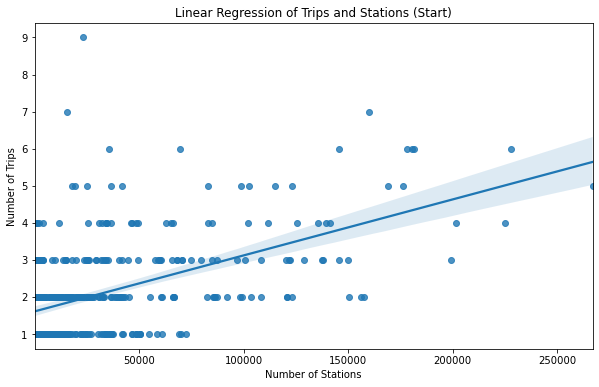

Coefficient of Linear Regression (StartStations): 1.51e-05
coefficient of determination (r2) for Start Stations: 0.28


In [8]:
X = trips_start_df.iloc[:, 2].values.reshape(-1, 1) 
Y = trips_start_df.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
lr=linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 

fig = plt.subplots( figsize=(10,6))
sns.regplot(X, Y)
plt.title('Linear Regression of Trips and Stations (Start)')
plt.ylabel('Number of Trips')
plt.xlabel('Number of Stations')
plt.show()

print("Coefficient of Linear Regression (StartStations): {:.3g}".format(lr.coef_[0][0]))

residual = Y-Y_pred
mean_Y= np.mean(Y)
rsq=residual *residual
ssr =sum(rsq)
sst = sum((Y-mean_Y)**2)
deter=ssr/sst
print("coefficient of determination (r2) for Start Stations: {:.2f}".format(1-deter[0]))

Above we have computed a sns reglot. The blue line refers to the lienar regression line. The translucent band lines, however, describe a bootstrap confidence interval generated for the estimate. Here we can see that as the number of Stations increases the range of the bootstrap confidence interval increases too. This means as the number of stations increases, the size of the confidence interval for the regression estimate increases accordingly making it harder to estimate the number of trips with the number of stations. 

##### Interpertation of the Linear Regression

For a linear regression with the stations as a predictor, the slope is 1.84e+04. It tells us that when the number of trips increases by 1 in a geoid, the number of stations in a geoid will change(increase) by 1.84e+04. This is a very small value signifying that the change in the number of stations will only result in a small change in the number of trips.

We can interpret 𝑟2 as the fraction of the variation in the output variable that can be explained (or predicted) by variation in the input variable(s). Therefore our r2 score of 0.28 means that approximately 28% (0.28) of the variation in Y can be explained(predicted) by X. In other words, the number of trips is explained well by the number of trips by approxmately 28% (0.28).

Now we will test this linear regression and compute additional statistics.

In [9]:
#rename columns
trips_start_df = trips_start_df.rename(columns={'Number of Trips': 'Trips', 'Number of Stations': 'Stations'})
trips_end_df = trips_end_df.rename(columns={'Number of Trips': 'Trips', 'Number of Stations': 'Stations'})

sm_model = smf.ols("Stations ~ Trips", data=trips_start_df)
result = sm_model.fit()
print("Start Stations",result.summary(),"\n")

Start Stations                             OLS Regression Results                            
Dep. Variable:               Stations   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     143.6
Date:                Sat, 08 May 2021   Prob (F-statistic):           3.21e-28
Time:                        19:54:17   Log-Likelihood:                -571.17
No. Observations:                 375   AIC:                             1146.
Df Residuals:                     373   BIC:                             1154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6082      0.073     

Here we can see that the p-value is 0 for the Stations. The p-value is the probability that, absent any link between trips and stations, an effect (or relationship) as large or larger than the observed effect would be measured. 
Here this means that assuming that there is no relationship between the trips and stations the probability that we would observe a relationship like this. That probability according to our findings is near 0. So we reject the null hypothesis that there is no relationship between the trips and stations.

However, just because we rejected the null does not automatically mean that there is a significant relationship between the trips and stations. To see if the relationship between trips and stations is significant enough, we will have to look at the r2 value. Here the r2 value is 0.279 (as we have found before). In scholarly research that focuses on marketing issues, R2 values of 0.75, 0.50, or 0.25 can, as a rough rule of thumb, be respectively described as substantial, moderate, or weak. Sarstedt, M., & Mooi, E. (2014,p.211). Therefore according to  Sarstedt, M., & Mooi, E. (2014,p.211), we can also say that the value of r2 of 0.297 signifies a weak relationship between the number of stations and the number of trips.

Overall, through our p-value we reject the null hypothesis that "There is no relationship between the number of trips and the number of stations in a geoid". However, through our r2 score of 0.279 we can conclude that the relationship between the trips and stations is weak. Therefore through these analysis we can conclude that **there is a weak relationship between the Trips and Station**. **It seems that the placement of stations in geoids is affected by other factors than on soley the demand of citibike usage** 

In our analysis above we have found that the distribution of citibike stations in NYC is somehow influenced by location. In our next step of our analysis, we will see how representitive citibike is of different race and income groups. In this step, we will be looking at the Race/Income distribution of NYC census data alongside the distribution of stations to understand the distribution of citibike with accordance to different race and income groups of NYC.

## Analysis 2: What is the relationship between station placement and NYC race & income demographics?

To further our understanding of the factors influencing Citibike station placements, we will look into the relationship between the race and income of a census tract and the number of stations located in the census tract. 

### Stations vs Racial Distribution 

We will first try to understand the relationship between station placements across census tracts and the racial distribution of the census tracts. Since NYC is a very diverse city and is known to have an uneven distribution of races, where certain ethnic groups are known to congregate in certain neighborhoods, such as in Chinatown, we decided to first categorize each census tract by their majoirty race. This is done, in order to study the relationship between census tracts with a particular majority race and the number of stations in that census tract, and it allows us to parse out what the specific dynamics are between each race and station placements. Furthermore, since we want to focus on the relationship between different race groups and station placements, we will not be including the "other" race category in our analysis. This is because the race category "other" is ambiguous and potentially misleading since it could encompass many different races. 

In [13]:
race_income_df['white_pct'] = 100*(race_income_df['2017_white_population'] / race_income_df['2017_population'])
race_income_df['black_pct'] = 100*(race_income_df['2017_black_population'] / race_income_df['2017_population'])
race_income_df['asian_pct'] = 100*(race_income_df['2017_asian_population'] / race_income_df['2017_population'])
race_income_df['other_pct'] = 100*(race_income_df['2017_other_population'] / race_income_df['2017_population'])
# Combining the race and stations
race_st_df = (race_income_df.set_index('geoid')).join((stations_df.set_index('geoid')),how='inner')
race_st_df['geoid'] = race_st_df.index
race_st_df.reset_index(drop=True,inplace=True)
# Counting the number of stations per geoid
stations =race_st_df.groupby('geoid')[['station_id']].count()
stations.rename(columns={'station_id':'num_stations'},inplace=True)
stations.reset_index(inplace=True)
race_st_df = race_st_df.set_index('geoid').join(stations.set_index('geoid'),how='inner')
race_st_df.reset_index()
race_st_df[:1]
race_st_df.shape
# assigning the majority race based on the max percentage race in each geoid
race_st_df['majority_race'] = race_st_df[['white_pct','black_pct','asian_pct', 'other_pct']].idxmax(axis=1)
# Only returns the census tracts where that race is the majority
w_major = race_st_df[race_st_df['majority_race'] == 'white_pct']
b_major = race_st_df[race_st_df['majority_race'] == 'black_pct']
a_major = race_st_df[race_st_df['majority_race'] == 'asian_pct']
o_major = race_st_df[race_st_df['majority_race'] == 'other_pct']

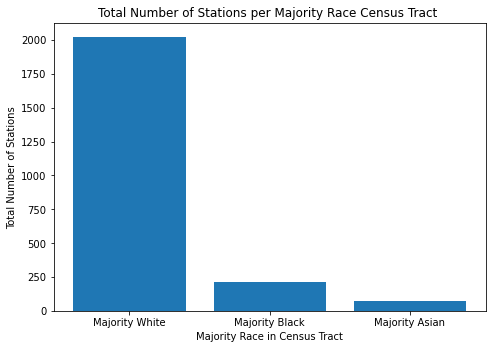

In [14]:
w_list = []
b_list = []
a_list = []
o_list = []
for i  in range(10):
    w_list = w_list + [race_st_df[race_st_df['num_stations'] == i].white_pct.mean()]
    b_list = b_list + [race_st_df[race_st_df['num_stations'] == i].black_pct.mean()]
    a_list = a_list + [race_st_df[race_st_df['num_stations'] == i].asian_pct.mean()]
    o_list = o_list + [race_st_df[race_st_df['num_stations'] == i].other_pct.mean()]
    
df = DataFrame (w_list,columns=['White Percentage'])
df['Black Percentage'] = b_list
df['Asian Percentage'] = a_list
df['Other Percentage'] = o_list
df= df[1:]
df = df.fillna(0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = ['Majority White', 'Majority Black', 'Majority Asian']
x = [w_major.num_stations.sum(), b_major.num_stations.sum(), a_major.num_stations.sum()]
plt.bar(y,x)
plt.title('Total Number of Stations per Majority Race Census Tract ')
plt.xlabel('Majority Race in Census Tract')
plt.ylabel('Total Number of Stations')
plt.show()

This bar graph shows the total number of stations in each of the majority race census tracts. From this bar graph, we can see that there is a much higher total number of stations across all of the predominantly white census tracts, which have in total close to 2000 stations, compared to majority Black and Asian census tracts. The very large difference in the number of stations in majority-white census tracts compared to black and Asian census tracts is very surprising, as although the most common ethnicity in NYC is White, the racial breakdown of NYC as a whole in 2017 is as follows: 47% White, 24% Black, and 17% Asian. Meaning that if the stations were placed at random, we would expect there to be roughly two times more stations in predominantly White areas compared to Black areas and approximately three times more stations in White areas compared to Asian areas. Thus, since the number of stations placed in White census tracts is almost eight times more than in Black census tracts and 20 times more than in Asian census tracts, this indicates that the placement of Citi Bike stations across each majority race census tract was done deliberately. 

Overall, this bar graph is a useful initial visualization of the distribution of stations across all of the different different majority race census tracts in NYC. However, to better understand the relationship between the placement of stations across census tracts and the racial distribution of the census tract, we will next look into the differences in racial distribution between census tracts with less then the median number of stations and the census tracts with above the median number of stations. 

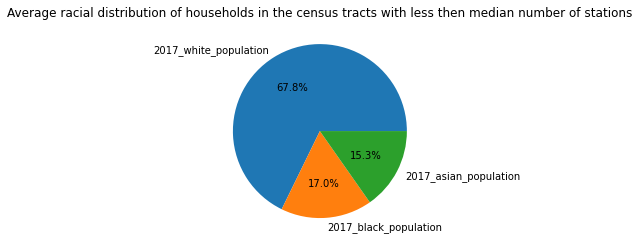

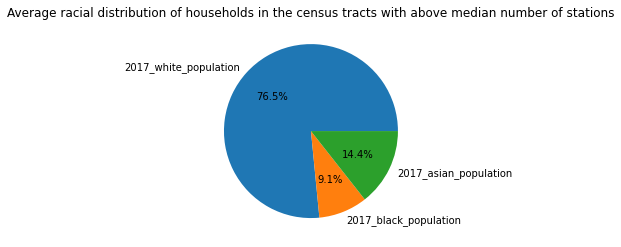

In [23]:
median_num_stations = int(race_st_df[['num_stations']].median())

#Census Tracts with <= median number of stationm
low_station_geoid_race_income_df = race_st_df[race_st_df['num_stations']<=median_num_stations]
low_station_geoid_race_sum = low_station_geoid_race_income_df[['2017_white_population','2017_black_population','2017_asian_population']].sum()
mylabels = low_station_geoid_race_sum.index
plt.pie(low_station_geoid_race_sum,labels=mylabels,autopct='%1.1f%%')
plt.title('Average racial distribution of households in the census tracts with less then median number of stations')
plt.show()

##Census Tracts with > median number of stationm
high_station_geoid_race_income_df = race_st_df[race_st_df['num_stations']>median_num_stations]
high_station_geoid_race_sum = high_station_geoid_race_income_df[['2017_white_population','2017_black_population','2017_asian_population']].sum()
mylabels = high_station_geoid_race_sum.index
plt.pie(high_station_geoid_race_sum,labels=mylabels,autopct='%1.1f%%')
plt.title('Average racial distribution of households in the census tracts with above median number of stations')
plt.show()

These two pie charts, illustrate the differences in the racial distribution of census tracts with less then or equal to the median number of stations and census tracts with more than the median number of stations. From these two pie charts, we see that on average census tracts that have a large number of stations on average have 77% white individuals whereas Census tracts that have the lower number of stations are only 67% white. Furthermore, Census tracts that have the large number of stations on average appears to have half the number of black individuals (9.1%), as compared to census tracts with a low number of stations (15.3%). Lastly, census tracts with more stations also have slightly less Asians compared to Census tracts with less stations. Thus, these two pie charts imply that more stations are generally placed in census tracts that have a higher percentage of White individuals and that have a lower percentage of Black and Asian individuals. However, this relationship cannot be confirmed through these pie charts alone, so in the next step we will use Logistic Regression to model the relationship between the racial distribution of a census tract and the number of Citi Bike stations in the census tract. 

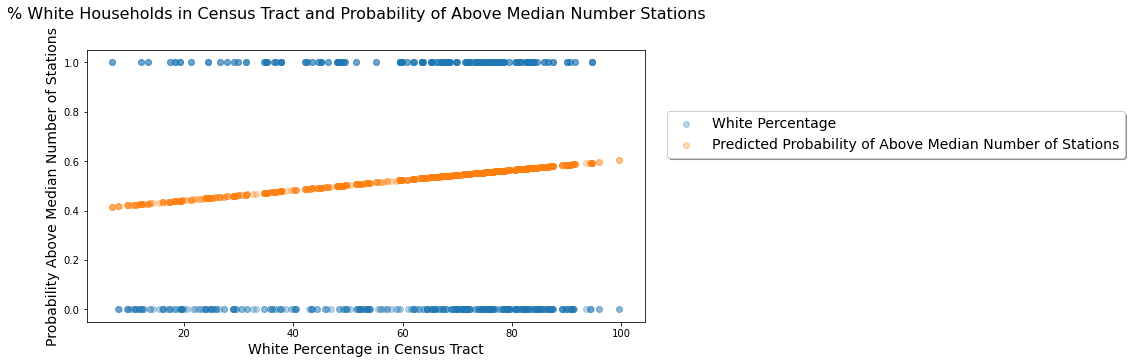

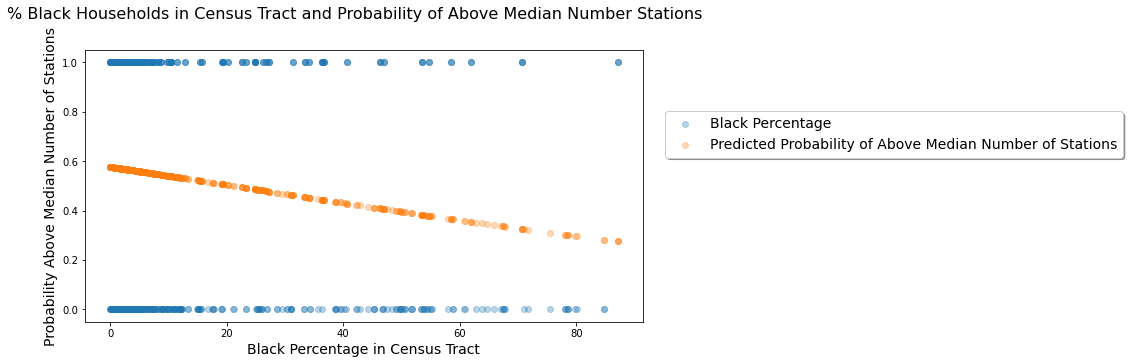

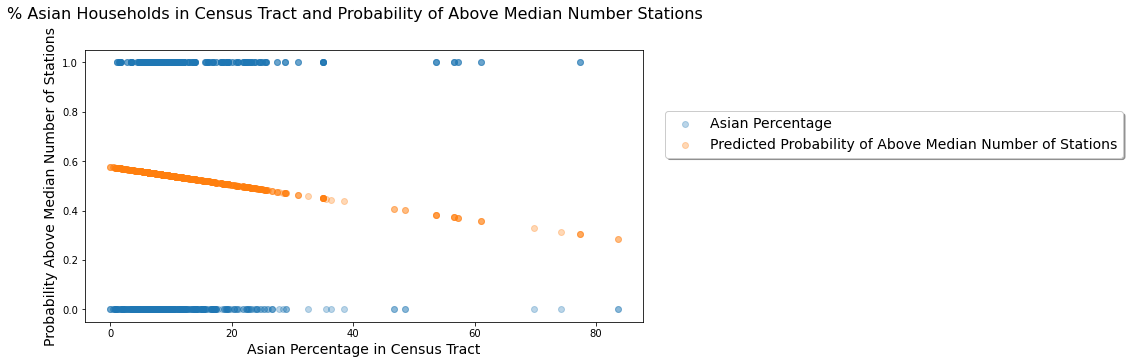

R^2 value of White Percentage and Above Median Stations: 0.54
R^2 value of Black Percentage and Above Median Stations: 0.56
R^2 value of Asian Percentage and Above Median Stations: 0.53


In [31]:
race_st_df['above_median_station'] = np.where(race_st_df['num_stations']>= median_num_stations, True, False)
racevsstations_w = LogisticRegression().fit(race_st_df[['white_pct']],race_st_df['above_median_station'])
predict_num_stations_w = racevsstations_w.predict(race_st_df[['white_pct']])

racevsstations_w.predict_proba(np.array([[50]]))
racevsstations_w.predict(np.array([[50]]))
# Logistic Regression for White Percentages and Above Median Number Stations
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.white_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='White Percentage'
)
plt.scatter(
    race_st_df.white_pct, 
    racevsstations_w.predict_proba(race_st_df[['white_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1, fontsize = 14)
plt.xlabel("White Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability Above Median Number of Stations", fontsize = 14)
plt.suptitle('% White Households in Census Tract and Probability of Above Median Number Stations', size=16, y=1);      
plt.show()
# Logistic Regression for Black Percentages and Above Median Number Stations

racevsstations_b = LogisticRegression().fit(race_st_df[['black_pct']],race_st_df['above_median_station'])
predict_num_stations_b = racevsstations_b.predict(race_st_df[['black_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.black_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Black Percentage'
)
plt.scatter(
    race_st_df.black_pct, 
    racevsstations_b.predict_proba(race_st_df[['black_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Black Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability Above Median Number of Stations", fontsize = 14)
plt.suptitle('% Black Households in Census Tract and Probability of Above Median Number Stations', size=16, y=1);      
plt.show()

#Logistic Regression for Asian Percentages and Above Median Number Stations
racevsstations_a = LogisticRegression().fit(race_st_df[['asian_pct']],race_st_df['above_median_station'])
predict_num_stations_a = racevsstations_a.predict(race_st_df[['asian_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.asian_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Asian Percentage'
)
plt.scatter(
    race_st_df.asian_pct, 
    racevsstations_b.predict_proba(race_st_df[['asian_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Asian Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability Above Median Number of Stations", fontsize = 14)
plt.suptitle('% Asian Households in Census Tract and Probability of Above Median Number Stations', size=16, y=1);      
plt.show()

w_r_sqr = racevsstations_w.score(race_st_df[['white_pct']],race_st_df['above_median_station'])
print('R^2 value of White Percentage and Above Median Stations:', round(w_r_sqr,2))

b_r_sqr = racevsstations_b.score(race_st_df[['black_pct']],race_st_df['above_median_station'])
print('R^2 value of Black Percentage and Above Median Stations:', round(b_r_sqr,2))

a_r_sqr = racevsstations_a.score(race_st_df[['asian_pct']],race_st_df['above_median_station'])
print('R^2 value of Asian Percentage and Above Median Stations:', round(a_r_sqr,2))

Since, the number of stations in a census tract is a discrete, we decided to use logistic regression instead of linear regression when trying to model the relationship between the racial percentage in each census tract and the number of stations in the Census Tract, as logisitic regression is a better model to use when the response variable (in this case number of stations) is categorical. Furthermore, since logisitc regression requires that the response variables takes a binary value, we decided to add a column to the dataframe that classifies wether the census tract has above the median number of stations. Then, we used logistic regression to predict the probability that a census tract has more than the median number of stations based on its racial distribution. Thus each of the three graphs above, show how the predicted probability of a census tract having above the median number of stations changes with the percentage of each race in the census tract: White, Black, and Asian. 

In the first graph, the predicted probability seems to have a positive slope. This indicates that census tracts with a higher proportion of White individuals have a greater probability of having more than the median number of stations. On the other hand, the predicted probability in the second graph has a negative slope. This indicates that census tracts with a higher propotion of Black individuals are less likely to have more than the median number of stations. 
In the third graph, the relationship between the proportion of asian individuals in a census tract and the number of stations also follows a similar relationship as the one in the second graph. Furthermore, we see that the three predictor models are able to account for 54%, 55%, and 53% of the variability in the data, meaning that we can conclude that there is a fairly strong relationship between the percentage of each race in a census tract and the number of stations in the census tract. 

Overall, these three graphs confirms the trend that we have seen previously in the previous analysis, as they suggest that that more stations are generally being placed in Whiter census tracts, and that census tracts with a higher percentage of Black and Asian individuals genrally have a lower number of stations. 

Since we've now confirmed that there is a relationship between race and number of stations, we now want to look into other factors that may play a role in influencing the distribution of Citi Bike stations in NYC. One such, component that may influence the disitrbution of Citi Bike stations is the income levels of a census tract. 

### Stations vs Income 

During Citi Bike's initial expansion into NYC, it was placed in relatively high income areas to ensure its usage <cite>[Wenya et. al.][1]</cite>. This is because an annual membership to Citi Bike costs an annual amount of 169 dollars<cite> [NYTimes] [2]</cite>. This cost can be prohibitive to many communities.

However, Citi Bike also has a program that allows public housing residents and food stamp users to buy a membership at 60 dollars a year <cite>[2]</cite>. With these two factors regarding cost in mind, it's important to study whether station placement allows residents from different income brackets to utilize Citi Bike.

[1]:https://www.researchgate.net/publication/328756164_The_Cost-Effectiveness_of_Bike_Share_Expansion_to_Low-Income_Communities_in_New_York_City
[2]:https://www.nytimes.com/2019/07/16/nyregion/citi-bike-nyc-bronx.html

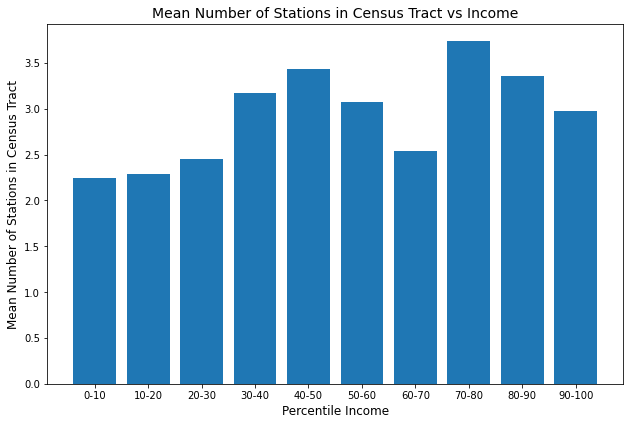

In [43]:
tenth = race_st_df[(race_st_df['2017_median_income']<=np.percentile(income, 10))].num_stations.mean()
bw_10_20 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 10)) & (race_st_df['2017_median_income']<=np.percentile(income, 20))].num_stations.mean()
bw_20_30 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 20)) & (race_st_df['2017_median_income']<=np.percentile(income, 30))].num_stations.mean()
bw_30_40 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 30)) & (race_st_df['2017_median_income']<=np.percentile(income, 40))].num_stations.mean()
bw_40_50 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 40)) & (race_st_df['2017_median_income']<=np.percentile(income, 50))].num_stations.mean()
bw_50_60 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 50)) & (race_st_df['2017_median_income']<=np.percentile(income, 60))].num_stations.mean()
bw_60_70 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 60)) & (race_st_df['2017_median_income']<=np.percentile(income, 70))].num_stations.mean()
bw_70_80 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 70)) & (race_st_df['2017_median_income']<=np.percentile(income, 80))].num_stations.mean()
bw_80_90 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 80)) & (race_st_df['2017_median_income']<=np.percentile(income, 90))].num_stations.mean()
bw_90_100 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 90)) & (race_st_df['2017_median_income']<=np.percentile(income, 100))].num_stations.mean()
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
y = ['0-10','10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','80-90','90-100']
x = [tenth, bw_10_20, bw_20_30, bw_30_40, bw_40_50, bw_50_60, bw_60_70, bw_70_80, bw_80_90, bw_90_100]
plt.bar(y,x)
plt.title('Mean Number of Stations in Census Tract vs Income', fontsize = 14)
plt.xlabel('Percentile Income', fontsize = 12)
plt.ylabel('Mean Number of Stations in Census Tract', fontsize = 12)
plt.show()

This bar graph groups together census tracts based on the decile which their median income level falls into and it shows the average number of stations in the census tracts that fall in each of these decile groups. By looking at the average number of stations in census tracts that fall within each income decile, we can look at wether there is an overall relationship between income percentile and the number of stations in each census tract. 

From this graph, it would seem that there's a general trend of increasing number of stations at higher percentiles of income. At the zero to 10 percentile, the mean number of stations is around 2.3, whereas census tracts that fall into the 70th to 80th income level, on average have around 3.7 stations. That being said, there are a few anomolies, which do not allow us to definitively conclude that more stations are being placed in Census Tracts that have a higher level of income. In order to further analyze and to confirm this trend, we will next use logistic regression to analyze the relationship between income and the number of stations in a census tract. 

## Logistic Regression

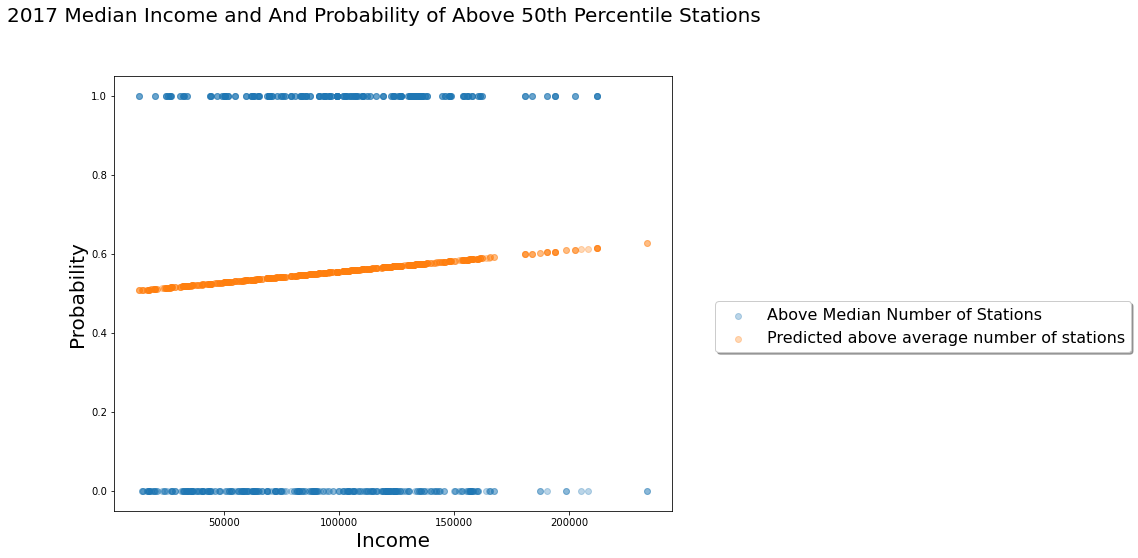

The r^2 value of median income and number of stations: 0.53


In [34]:
incomevsstations = LogisticRegression().fit(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
predict_num_stations_income = incomevsstations.predict(race_st_df[['2017_median_income']])

incomevsstations.predict_proba(np.array([[50]]))
incomevsstations.predict(np.array([[50]]))
fig = plt.figure(figsize = (10,8))

# Plotting the probability of above median stations vs. income
plt.scatter(
    race_st_df['2017_median_income'], 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Above Median Number of Stations'
)
plt.scatter(
    race_st_df['2017_median_income'], 
    incomevsstations.predict_proba(race_st_df[['2017_median_income']])[:,1], 
    alpha = 0.3,
    label='Predicted above average number of stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.5),fontsize = 16, shadow=True, ncol=1)
plt.xlabel("Income", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.suptitle('2017 Median Income and And Probability of Above 50th Percentile Stations', size=20, y=1);      
plt.show()
income_sqr = incomevsstations.score(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
print('The r^2 value of median income and number of stations:', round(income_sqr,2))

In order to further study and confirm the relationship we've observed between income and number of stations, we decided to do a logistic regression. This is because, as with studying race and number of stations, the number of stations are descrete values, which prevents us from utilizing linear regression. Moreover, the number of stations is not dependent on income just on its own, so a linear model would not be applicable here. 

This graph looks at the median income of census tracts and their predicted probability of having an above median number of stations. It would seem that at the lower levels of income, the probability of having an above median number of stations is around .5. However, as the income within a census tract increases, the probability slowly increases as well. This indicates that at higher income levels, there is a greater probability of having larger number of stations. And because the r^2 value is .53, the prediction model explains 53% of the data which is fairly good.

Now that we've seen race and income separately, we should look at their relationship in conjunction with stations. 

### Main Statements

rq : how is citibike representing NYC demographics? 


a1 : trips vs stations

Trips cannot predict stations! Station placement is affected by sth else! 


a2: race/income vs stations

There is a relationship between race/income and stations! 


after a1, a2 we need to answer the question of where citibike should be distributed more. 


A3: trips vs race/income
→ white/high income take more trips? (check) 
→ bar graph: looking at both trips and stations  checking fairness by race

→ population normalizaiton




(evalsig)
- A1: permutation trips vs stations really no relationship!
- A2: (sth) to say there is a significant relationship btw race/income and stations
        - could be the lineargraph but should be more straight forward. 


(conclusion)
- interms of race/income not representing NYC demographics well (explain nummerically with graphs)
- in terms of trips not representing NYC demographics well(explain nummerically with graphs)
- seems to be stations located in parks. But the usage of those stations are not that high at all so there isn't a fair distribution (explain nummerically with graphs)

(proposal)
- in what geoids should there be more stations? 
    - single out places that have minority race/incoem and 
- other things citibike can do
    - shrink cost of usage
    - ~~~ safer roads

# Evaluation of Significance 

### 1. Evaluation of Significance for Preregistered Analysis 1

#### Summarization of Results we found in Analysis 1

In our Analysis 1 we concluded with the following results.

- With our p-value of near 0 we reject the null hypothesis that "There is no relationship between the number of trips and the number of stations in a geoid" . 
- On correlation between trips and stations, we get a Pearson correlation of 0.53 and a Spearman correlation of 0.48. The correlation values are around 0.5 which signifies that the strength of relationship between trips and stations is moderate.
- The r2 score is 0.279. This means that approximately 28% of the variance of the stations can be explained by the trips. We also end up with a very similar adjusted r2 value. 

Overall, we concluded that the relationship between the trips and stations was moderate. When looking into the geoids with most stations, we found that location also plays a role in the placement of stations. With a moderate relationship between trips and stations and a r2 score of 0.279, we were able to tell that the number of trips taken wasn't the only factor that was influencing the distribution of stations. 

Now in this step of the project, we will evaluate  

1. There is a relationship between trips and stations and this isn't a relationship just observed by chance in our data.
> We have observed through our linear regression that the there is a moderate linear relationship between trips and stations. We will be confirming this with permutation.

2. Does this positive linear relationship between trips and stations still hold if we compute linear regression dividing geoids with less stations and geoids with more stations. (geoids with stations 1,2,3,4 group A , geoids with stations 5,6,7,9 group B )
> We have observed in the scatterplot above in Analysis 1 of trips vs stations that 



###  Permutation of Trips & Stations


When we tested the relationship between trips and stations in the data analysis (Analysis 1) **from above,we concluded that there is a moderate relationship between the trips and stations**. 
> In this step of the analysis we will check through permutation, to see if the the weak relationship between trips and stations we observe in our data is what we would reasonably expect to get by chance. 

In [8]:
def permute(input_array):
    permuted = input_array.copy()
    np.random.shuffle(permuted)
    return permuted

Here, we have created a permutation function that will shuffle the x and y values to remove any association between inputs and outputs. 

**This function (permute) above will make the x values randomly associated with the y values.**

This will produce a null hypothesis experiement where the x values are no longer associated with the y values. Doing this, we will able to get an estimate of the different kinds of measured slopes between the x and y values. With this we will measure what fraction of times we see a slope as great as or greater than the one we actually see in our data.

Now for our next step, we will visualize what this permute function is essentially doing.

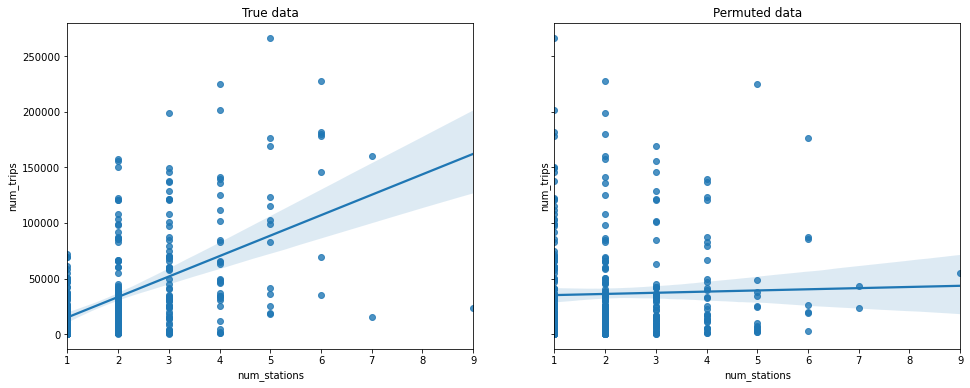

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x=trips_start_df.num_stations, y=trips_start_df.num_trips, ax=ax1)
ax1.set_title('True data')
sns.regplot(x=trips_start_df.num_stations, y=permute(trips_start_df.num_trips), ax=ax2)
ax2.set_title('Permuted data')
plt.show()

Here, the True graph is the original relationship between trips and stations in our data. The permuted data is the permuted relationship between x and y and the estimated regression slope.
The Permuted Graph shows a near horizontal regression slope with the permuted y-values (trips). On one trial were we permute the y-values to randomly associate the x-values with the y-values, we can see that we are getting a regression slope that is significantlt different from the regression slope in our original data.
In creating both of these graphs we have used the sns regplot() function that gives a linear regression estimate of the slope in a blue line and shows the bootstrapped confidence interval range with the blue highlighted region. 

Now since we have seen what the results of the permute function does, we will repeat this process multiple times. First, we will write a function that will plot a graph on the permuation results

In [46]:
def plot_model_line(df, model, is_resampled=True):
    '''
    Takes a dataframe and a fitted model
    Plots a line of best fit to the data
    '''
    if is_resampled:
        color="grey"
        alpha=0.1
    else:
        color="steelblue"
        alpha=0.7
    plt.plot(df['Trips'], df['Trips'] * model.coef_[0] + model.intercept_, color=color, alpha=alpha)

This function plot_model_line() will plot the different permuted regression slopes in the color gray and the original data's permuted slope in the color blue and visualize the relationship between the original regression slope of the data and the permuted data's regression slopes.

Now for our next step we will plot 100 iterations of models on our permuted data and visualize that on a graph.

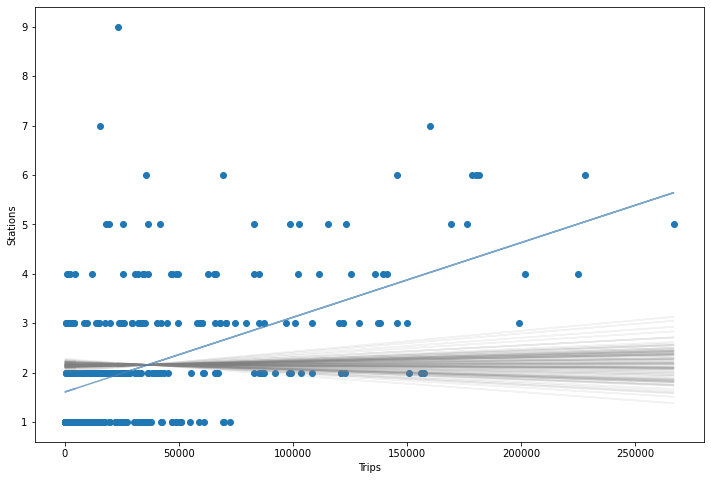

In [48]:
fig = plt.subplots(figsize=(12,8))

# plot true data
plt.scatter(trips_start_df['Trips'], trips_start_df['Stations'])

# plot 100 iterations of models on permuted data
for i in range(100):
    fake_model = LinearRegression().fit(trips_start_df[['Trips']], permute(trips_start_df['Stations']))
    plot_model_line(trips_start_df, fake_model)

# model true data and plot
model = LinearRegression().fit(trips_start_df[['Trips']], trips_start_df['Stations'])
plot_model_line(trips_start_df, model, is_resampled=False)
    
plt.xlabel('Trips')
plt.ylabel('Stations')
    
plt.show()

The result of our permutation shows that there are no steeper slopes that are greater than our observed slope. All the gray lines of predicted regression slopes for permutation are less steeper than our original data's observed slope of regression. There is a point of convergence for the models at the point of the mean. If we check the mean of the number of trips and the number of trips we can check that it is, 2.15 and 36322 like we observe on the graph.

In [50]:
print( "Mean of the number of stations: ",trips_start_df.Stations.mean())
print("Mean of the number of trips: ", trips_start_df.Trips.mean())

Mean of the number of stations:  2.1573333333333333
Mean of the number of trips:  36322.14133333333


Now we will conduct this permutation 10000 times to get a more accurate estimate of how likely we are to observe a pattern like we did in our original data assuming that the association between the x-values and the y-values is random. 

In [55]:
steeper_slopes = 0
n_permutations = 10000
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    fake_model = LinearRegression().fit(trips_start_df[['Trips']], permute(trips_start_df.Stations))
    
    permuted_slopes[i] = fake_model.coef_[0]
    
    if np.abs(fake_model.coef_[0]) > np.abs(model.coef_):
        steeper_slopes += 1
    
print("Percentage of slopes that are greater than our observed slope",steeper_slopes / n_permutations)

Percentage of slopes that are greater than our observed slope 0.0


Out of the 10000 iterations we created we were never able to observe a permutation regession slope that was steeper than our data's original observed regression slope. 
This means that there is a near 0 chance of observing a slope this large under our null hypothesis with no relationship between trips and stations. 

We say that the null hypothesis is that there is no relationship between trips and stations because we have permuted the station values to make the association between stations and trips random. Under the null hypothesis we have observed through permutation that it is impossible to observe a slope as steep as we have observed in our original data. 

Therefore the conclusion we reached in Analysis 1, that there is a linear relationship between trips and stations is true and can be confirmed through this permutation. We will compute a distribution to show this more clearly.

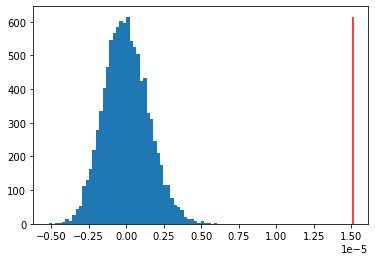

In [54]:
binsizes, _, _ = plt.hist(permuted_slopes, bins=50)
plt.vlines(model.coef_[0], ymin=0, ymax=np.max(binsizes), color='red')
plt.show()

Once again we can see through this distribution that when we permute the y-values(stations) and repeat the process 10000 times, we never observe a slope as steep as the one in our original data. This can be confirmed through the placement of the red line at the far end of the graph, lying far away from the distribution. This red line is the regression slope of the trips and stations in our original data. Therefore we can confirm that under the null hypothesis is that there is no relationship between trips and stations, there is basically no chance of observing a relationship as extreme has we have obsereved on our data.

This matches with our original discovery in Analysis 1 that there is a relationship between trips and stations in our original data. However, in Analysis 1, as we looked further into the coefficients and the r2 score of the linear regression, and found that though there is a linear relationship between trips and stations, there may be other factors influencing the placement of stations.
We were able to conclude this because we got a Pearson correlation of 0.53 and a Spearman correlation of 0.48. The correlation values are around 0.5 which signifies that the strength of relationship between trips and stations is moderate. Additionally, we observed that the r2 score is 0.279. This means that approximately 28% of the variance of the stations can be explained by the trips. However, this means that there are a great percentage of variability in the trips that cannot be explained by the number of stations in a geoid. 


# Interpretation and Conclusion 

Under the research question, "**How is Citi Bike representing NYC demographics? (in 2017)**" we went through largely four steps to answer this question.

1. Is Citi Bike station Placement mostly influenced by Demand (the number of trips taken)?
> We studied the relationship between trips and stations and confirmed that there was a positive relationship between trips and stations. However, we also concluded that demand wasn't the only factor that influenced the placement of stations in NYC. When we computed linear regression, we found that the correlation values are around 0.5 which signifies that the strength of relationship between trips and stations is moderate. Among the top stations we also found that location was a factor that seemed to influence the placement of stations.

2. Can Race/Income predict Station

This led us to investigating the specific demographics of those areas and researching more into the specific demographics of NYC in conjunction with station placement based on geoid. We found that census tracts with majority white households had a consistently high number of stations when compared to other racial groups. This is consistent with what we found for the geo ids with seven or more stations. Moreover, we found that census tracts with higher income also consistently had a high number of stations. This indicates a racial and income disparity in Citi Bike station placement. In order to confirm this trend, we looked further into the demographics of Citi Bike users based on trip data. 

From this trip data, we found that Citi Bike's placement in predominantly white area is logical given the fact that it would appear that predominantly black census tracts are less likely to utilize Citi Bike. However, because this could be due simply to the higher number of Citi Bike stations in these areas, we decided to normalize the data. We normalized the data by dividing the number of trips by the number of stations. When using this normalized data, we found that predominantly asian areas had a high number of trips per station. This indicates that Citi Bike's placement is not meeting the demand of these Asian census tracts. 

Moreover, our research in Citi Bike creation indicates that while Citi Bike does address the need for Citi Bike stations in white areas, they are not doing as well for black and asian areas. Specifically, areas with a predominantly asian population indicate that Citi Bike is not meeting the needs of these areas. 

These findings indicate that as of 2017 Citi Bike has needed to make a substantial effort in building more stations in poor and non-white areas. This has been supported by Citi Bike's recent expansion in 2020, which has added 36 new stations. 



# Limitations

### Overall Limitations

- We acknowledge that race and income are not the only factors that contribute to the distribution of Citi Bike stations around NYC. We are trying to see if there is a correlations for race and income with the distribution of Citi Bike stations. 

- Since our data is based off of Citi Bikes in 2017, our results are limited to that year only. That being said, they may be an indicator of how Citi Bike stations are distributed for other years as well.

### Citi Bike Trip Data Limitations

- The trip data **only includes the 'Subscribers' of the users**. Though there may be some one-time-customer passes from NYC residents, due to the large amount of data we decided to settle on subscribers only because there was a higher chance that these people were actually new york city residents. So our data may not be representative of other NYC residents that may have only used one-time passes. 

- We dropped rows where start station = end station. When the start station = end station we assumed that there would probably we a majority of cases where people where having trouble with using Citi Bike in the inital process. However, **there may be cases where people would have been able to make complete round trips and returned them back to the same location in for some of the trips where the start station = end station**

### Citi Bike Stations Data Limitations

- One possible limitation of this station data set is that the **count of the number of trips taken from a station is actually the count up to the end of 2019, whereas our project focuses on 2017**. However, there is a workaround for this problem since we also have the trip data, we can just recalculate the number of trips taken from each station up to the end of 2017. 

- Another limitation is that **the station start date is not actually the date the station was added to the network but is instead the date at which the first trip was taken from the station**, which might not always be the same.

### Race and Income Data Limitations

- One possible limitation of this data set is that **it only looks at survey data from 2017**. However, this is also consistent with the current data available on the American Community Survey website. Currently, the survey website data is only updated up until 2017. Because of this limitation, there may not be potential inaccuracies with representation in the data.

- Moreover, populations like the homeless or digital nomads may not be recorded in the data. That being said, the survey itself was collected using this method in order to avoid bias in the data. 

## Source Code 


1) Lecture Notes: https://colab.research.google.com/drive/1pMK18-DQoBDA_9rSzio6LJtkCJWxJF1g?usp=drive_open#scrollTo=6p2-tZKgM4He

2) Stack Overflow, Pandas, Matplotlib Documentation  : 

    -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
    -  https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

## Acknowledgements

1) MIT Citi Bike study :  https://aberke.github.io/income-race-bikes/

2) Equity in Citi Bike study : https://trec.pdx.edu/research/project/884 

<em>Special Thanks to Professor Wilkens, Head TA Stephen Cowpar, TA ... in helping us answer our research question properly, find methods to solve our problems, and focus on the direction of our study</em>

## Appendix

1) Citi Bike Trip data Data Cleaning Notebooks : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/citibike

2) NYC Race & Income Data Cleaning Notebooks : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/race_and_income 

3) Citi Bike Stations Data Cleaning Notebook : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/stations

4) Citi Bike Data Cleaning process Phase 2 : https://github.com/shljessie/citibike-nyc/blob/master/project_phase_submissions/phase2_final_notebook.ipynb

<!-- 5) Citibike Trip Data Additional Cleaning :  -->